# 1. General Code

## 1.1 Libraries

In [1]:
# Libraries for data manipulation and analysis
import zipfile  # Used to decompress .zip containing .csv files
import pandas as pd  # Used for data frame analysis
import numpy as np  # Used for statistical analysis
import missingno as msno  # Used for visualizing null values in data frames
import re  # Used for applying regex expressions
from packages.common_functions import decompress_file, load_csv_into_dataframe, load_dataframe_to_csv # Used for commons needs

In [2]:
# Libraries for statistical analysis
import scipy.stats as st  # Used for statistical analysis

In [3]:
# Libraries for data visualization
import matplotlib.pyplot as plt  # Used for data visualization

In [4]:
# Libraries for machine learning
import joblib  # Used for importing the best ML models
from sklearn.preprocessing import LabelEncoder  # Used for encoding column values

# 2. CSV Files


In [5]:
# List of file paths and their corresponding destination directories
csv_file_paths_and_destinations = [
    ('../data/raw_csv/2013__2014_census_data.csv.zip', '../data/raw_csv/'),
    ('../data/raw_csv/2020_sixty_plus_heatmap.csv.zip', '../data/raw_csv/')
]

In [6]:
# Iterate over each file and destination pair, calling the decompress_file function
for file_path, destination in csv_file_paths_and_destinations:
    decompress_file(file_path, destination)

Files successfully decompressed to: ../data/raw_csv/
Files successfully decompressed to: ../data/raw_csv/


## 2.1 Reading Unzipped CSV


In [7]:
# Read .csv file and load into a DataFrame
DF_PATH = '../data/raw_csv/2013__2014_census_data.csv'
df = load_csv_into_dataframe(DF_PATH)

CSV file successfully load in DataFrame.


In [8]:
# Display a sample of four records from the DataFrame
df.sample(4, random_state=4)

,IDENTIF_SECT,AREA_2000,Ciudad Autorepresentada,Provincia,Zonas de Planificación,Región Natural,ZONA,PERIODO,SEXO,EDAD,Nivel educativo superior,Grado o curso más avanzado que aprobó,Posición ocupacional,monto mensual vivienda,Tiempo de trabajo – Años
31615,70950013001,Urbano,,El Oro,Zona 7,Costa,13,Mayo 2014,Hombre,29,Secundaria,4,Jornalero o peón,6,
59306,120550013009,Urbano,,Los Rios,Zona 5,Costa,13,Abril 2014,Hombre,19,Educación Media o Bachillerato,2,Trabajador del hogar sin pago,,
63241,130450999008,Rural,,Manabi,Zona 4,Costa,999,Febrero 2014,Mujer,41,Secundaria,3,Jornalero o peón agropecuario,2,
101520,220355999001,Rural,,Orellana,Zona 2,Amazonía,999,Abril 2014,Hombre,3,,,,,


## 2.2 Columns


### 2.2.1 Dropping Columns


In [11]:
# List of column names to drop from the DataFrame
columns_to_drop = ['MONTO_VIVIENDA_MENSUAL', 'ZONA', 'POSICION_OCUPACIONAL']

In [12]:
# Drop specified columns from the DataFrame
df.drop(columns=columns_to_drop, axis=1, inplace=True)

### 2.2.2 Renaming Columns


In [9]:
# Dictionary to map old column names to new column names
cols_rename = {
    'IDENTIF_SECT': 'ID_SECTOR',
    'AREA_2000': 'AREA_2000',
    'Ciudad Autorepresentada': 'CIUDAD',
    'Provincia': 'PROVINCIA',
    'Zonas de Planificación': 'ZONA_PLANIFICACION',
    'Región Natural': 'REGION_NATURAL',
    'ZONA': 'ZONA',
    'PERIODO': 'PERIODO',
    'SEXO': 'SEXO',
    'EDAD': 'EDAD',
    'Nivel educativo superior': 'ULTIMO_NIVEL_EDUCATIVO',
    'Grado o curso más avanzado que aprobó': 'GRADO_CURSO',
    'Posición ocupacional': 'POSICION_OCUPACIONAL',
    'monto mensual vivienda': 'MONTO_VIVIENDA_MENSUAL',
    'Tiempo de trabajo – Años': 'ANIOS_TRABAJO'
}

In [10]:
# Rename columns in the DataFrame
df.rename(columns=cols_rename, inplace=True)

### 2.2.3 Reordered columns

In [29]:
# Define the ordered columns for DataFrame
ordered_columns = [
    'ID_SECTOR', 'AREA_2000', 'PROVINCIA', 'ZONA_PLANIFICACION',
    'REGION_NATURAL', 'SEXO', 'EDAD', 'ULTIMO_NIVEL_EDUCATIVO',
    'GRADO_CURSO', 'ANIOS_TRABAJO', 'MES', 'ANIO', 'CIUDAD'
]

In [30]:
# Reorder DataFrame columns based on the specified order
df = df[ordered_columns]

## 2.3 Null Values


### 2.5.1 Handling Null Values

In [13]:

# List of null string values used by convention
common_na_strings = ["faltante", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
                    "N / A ", "na", "n a", "n/a", "na "," na", "n /a", "n / a", " a / a", "n / a ",
                    "NULO", "nulo", "", "?", "*", ".", " "]

In [14]:
# List of null numbers values used by convention
common_na_numbers = (-9, -99, -999, -9999, 9999, -1)

### 2.5.2 Replacing Null Values

In [15]:
# Replace null values used by convention with np.nan in the DataFrame
df = df.replace(
    to_replace=common_na_strings,
    value=np.nan
).replace(
    to_replace=common_na_numbers,
    value=np.nan
)

<AxesSubplot:>

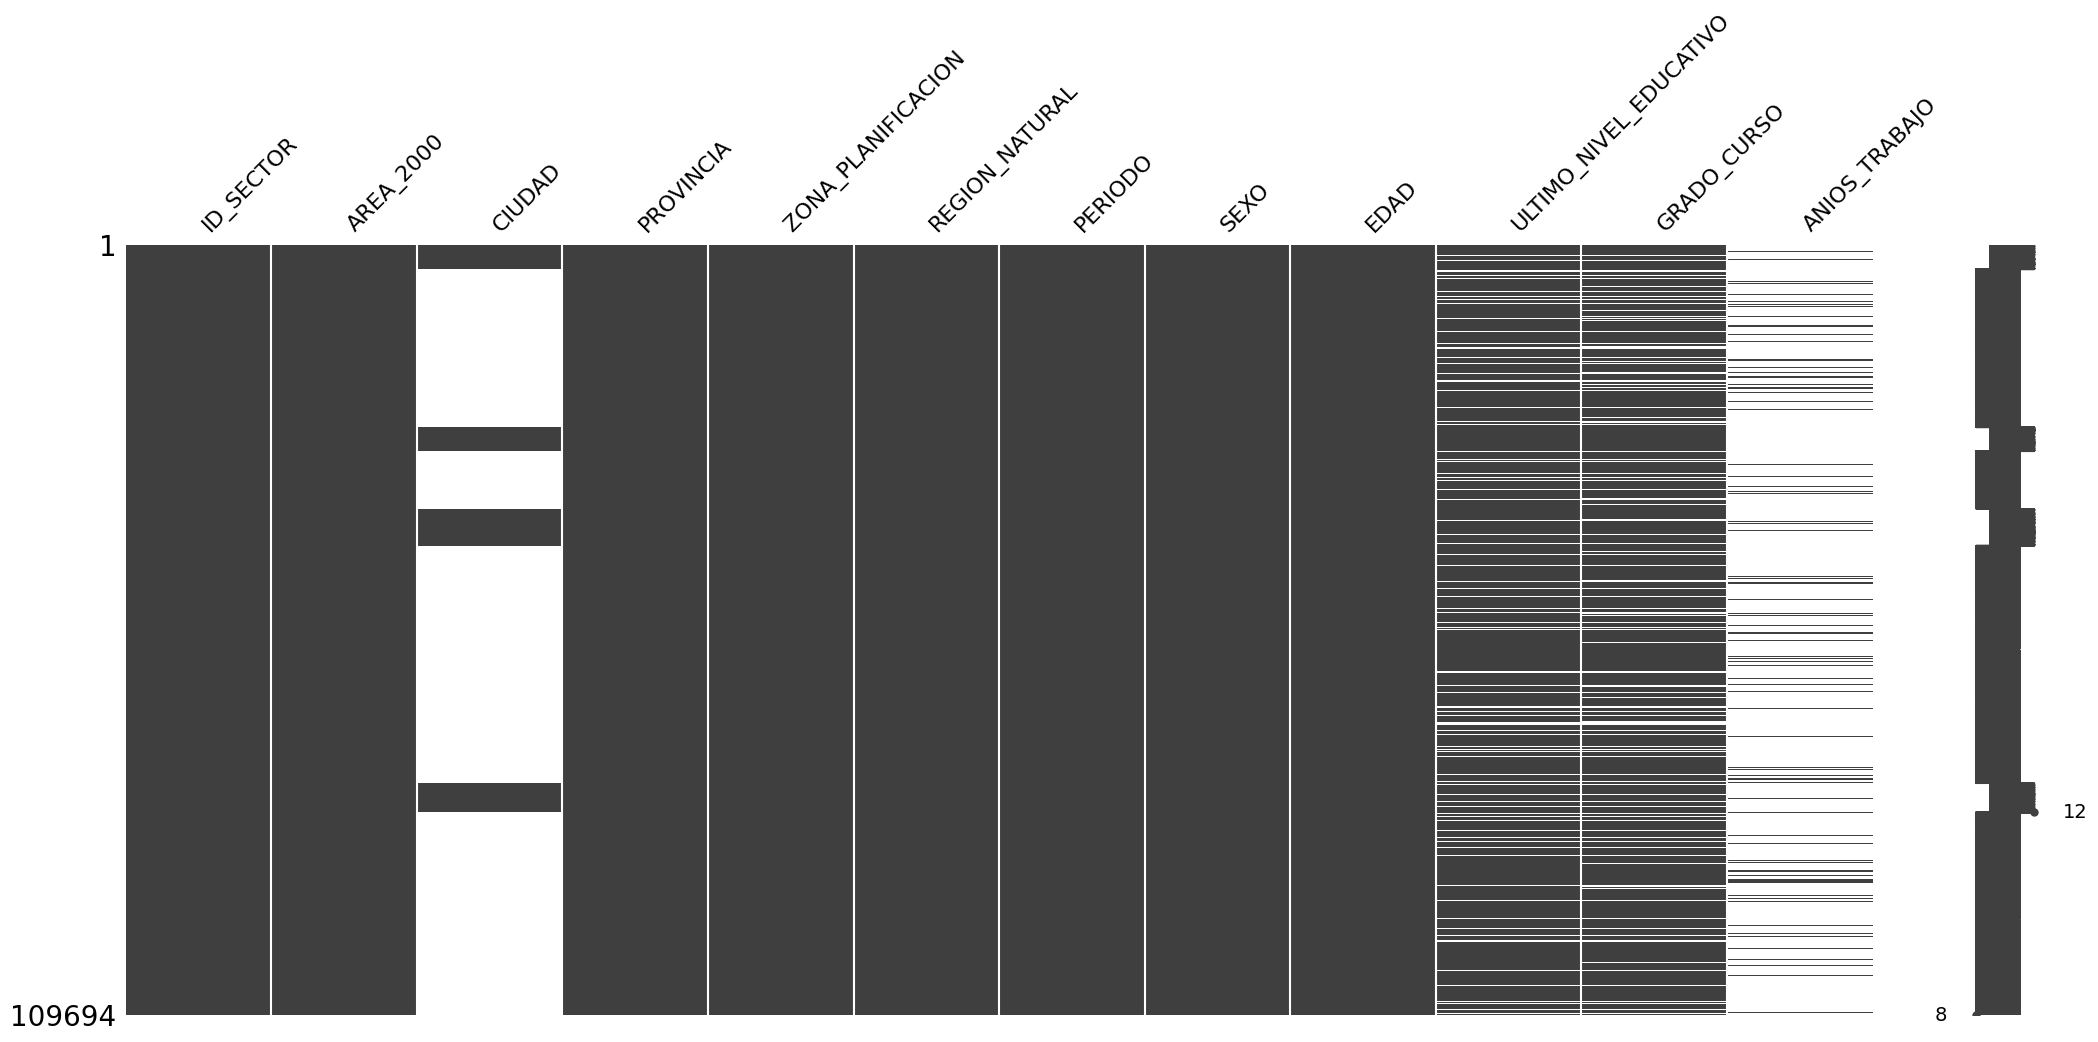

In [16]:
# Visualize matrix with null values by columns using msno library
msno.matrix(df)

<AxesSubplot:>

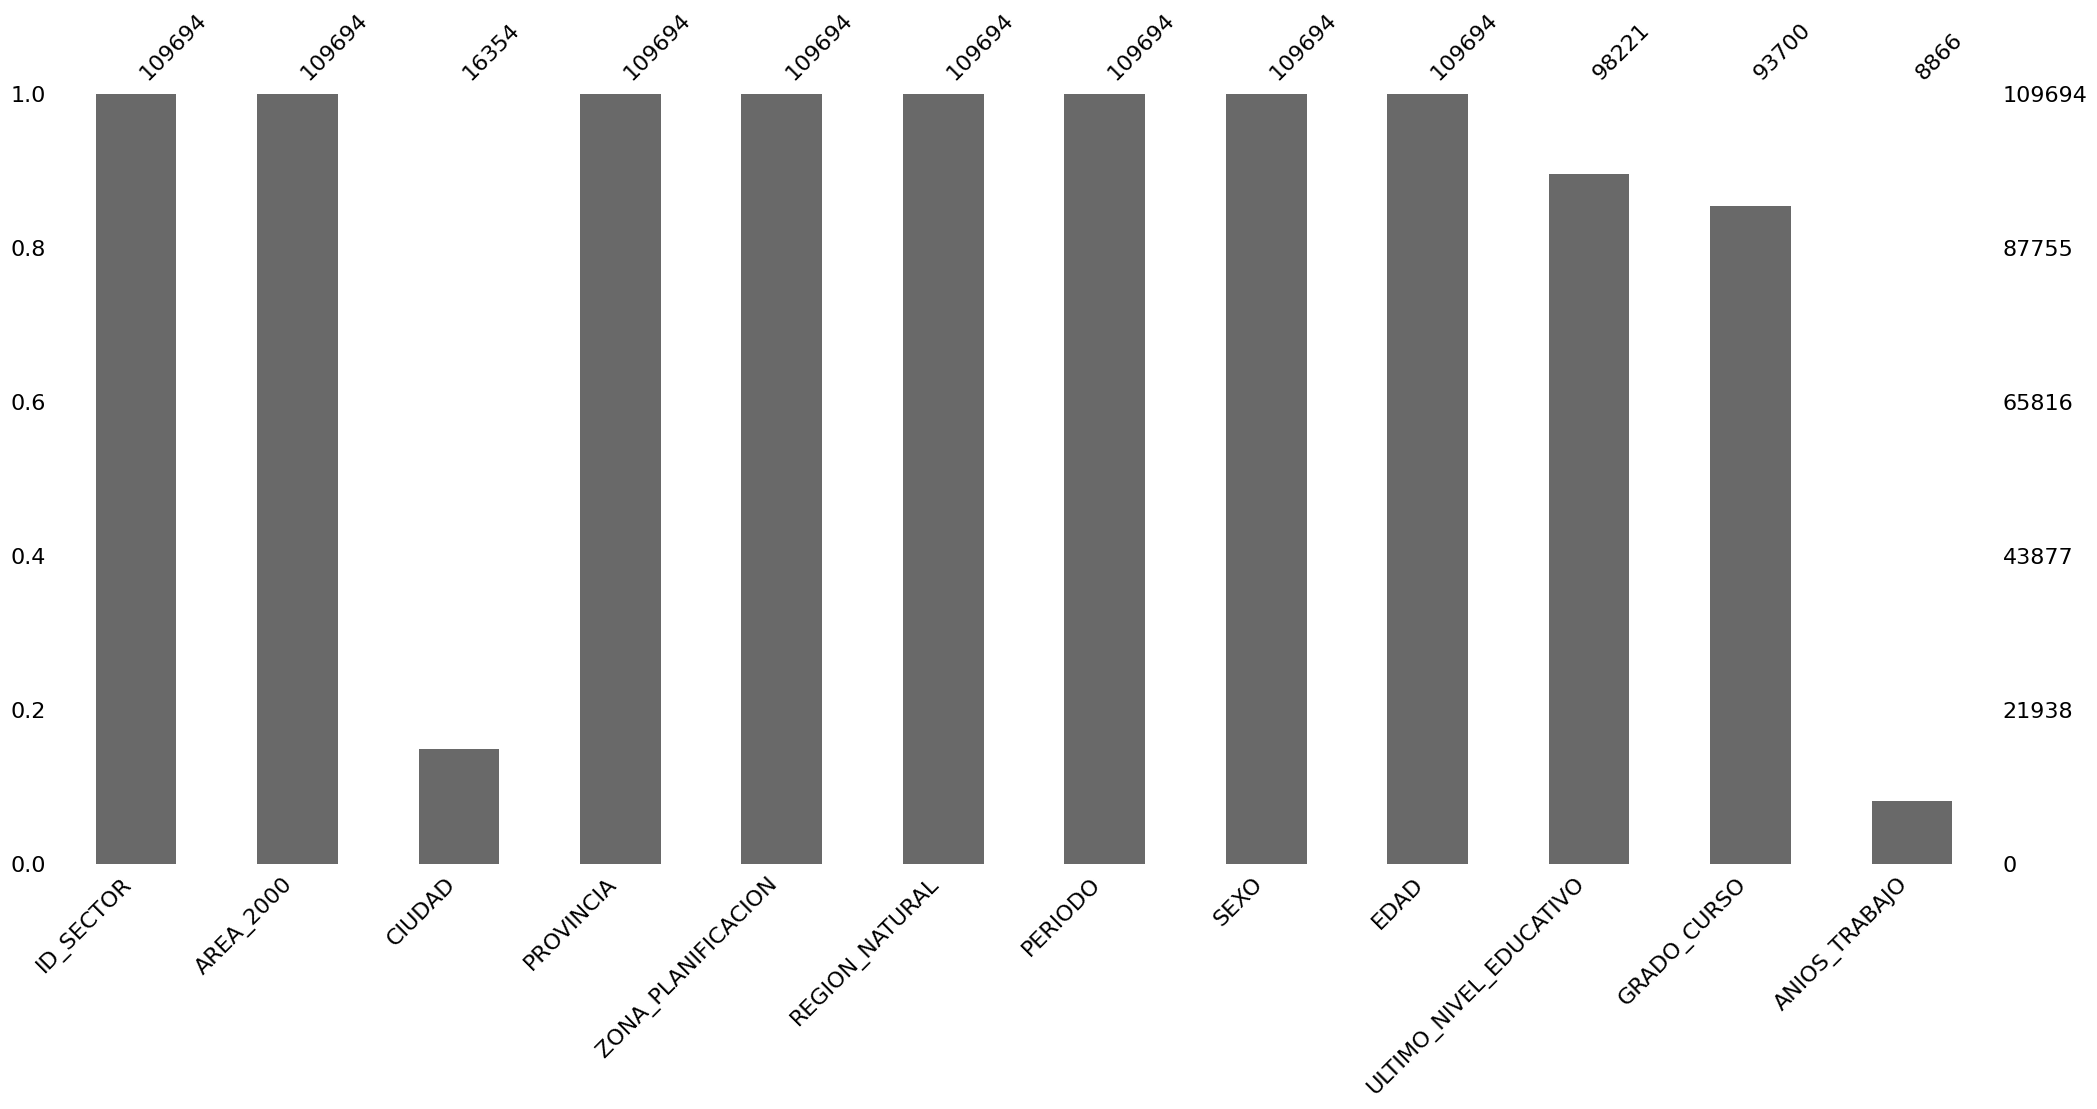

In [17]:
# Visualize bars with null values by columns using msno library
msno.bar(df)

## 2.4 Values


### 2.4.1 Data Types


   - Convert to Category Columns


In [18]:
# Explore data types of columns in the DataFrame
df.dtypes

ID_SECTOR                  int64
AREA_2000                 object
CIUDAD                    object
PROVINCIA                 object
ZONA_PLANIFICACION        object
REGION_NATURAL            object
PERIODO                   object
SEXO                      object
EDAD                      object
ULTIMO_NIVEL_EDUCATIVO    object
GRADO_CURSO               object
ANIOS_TRABAJO             object
dtype: object

In [19]:
# List of column names to convert to the 'category' data type
columns_to_category = ['AREA_2000', 'CIUDAD', 'PROVINCIA', 'REGION_NATURAL', 'SEXO', 'ULTIMO_NIVEL_EDUCATIVO']

In [20]:
# Convert specified columns to the 'category' data type
df[columns_to_category] = df[columns_to_category].astype('category')

   - Convert to Integer Columns


In [21]:
# Extract the number from the 'ZONA_PLANIFICACION' column
df['ZONA_PLANIFICACION'] = df['ZONA_PLANIFICACION'].str.extract('(\d+)').astype(int)

In [22]:
# Split the 'PERIODO' column into 'MES' and 'ANIO' columns
df['PERIODO'] = df['PERIODO'].str.split()
df[['MES', 'ANIO']] = df['PERIODO'].apply(lambda x: pd.Series(x))
df.drop('PERIODO', axis='columns', inplace=True)

In [23]:
# Dictionary mapping month names to their numerical equivalents
mes_to_num = {
    'Noviembre': 11,
    'Diciembre': 12,
    'Mayo': 5,
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Junio': 6,
    'Abril': 4,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10
}

In [24]:
# Replace month names with their numerical equivalents in the 'MES' column
df['MES'] = df['MES'].apply(lambda x: mes_to_num[x])

In [25]:
# Replace values greater than 98 years in 'EDAD' column with the numerical value 100
df['EDAD'] = df['EDAD'].apply(lambda x: 100 if x == '98 años y mas' else x)
df['ANIOS_TRABAJO'] = df['ANIOS_TRABAJO'].apply(lambda x: 1 if x == 'Menos de 1 mes' else x)

In [26]:
# Replace column types from select columns to integer
columns_to_int = ['EDAD', 'GRADO_CURSO', 'ANIOS_TRABAJO', 'ANIO', 'MES']

# Fill missing values in the specified columns with 0
df[columns_to_int] = df[columns_to_int].fillna(0)

# Convert the specified columns to integer data type
df[columns_to_int] = df[columns_to_int].astype(int)

## 2.5 Standardization text values to lower case


In [27]:
# Get columns of type 'object' and load into a variable
columnas_object = df.select_dtypes(include=['object', 'category']).columns

In [28]:
# Loop through columns of type 'object' and convert to lowercase
for columna in columnas_object:
    df[columna] = df[columna].str.lower()

## 2.6 Saving DataFrames to .csv Files


In [31]:
# path to save the clean csv
CLEAN_DATA_PATH_SAVED = '../data/processed_csv/2014_census_clean.csv'

In [32]:
# call to function charge of save dataframes in specific location
load_dataframe_to_csv(df, CLEAN_DATA_PATH_SAVED)

DataFrame successfully saved to: ../data/processed_csv/2014_census_clean.csv


## 2.7 Observations


### 2.7.0 Pre-Imputation Null Values


Some columns have worrying percentages of missing values. For example, 'CIUDAD', 'POSICION_OCUPACIONAL' and 'ULTIMO_NIVEL_EDUCATIVO' have a high percentage of missing values.

**It will be in the Exploratory Data Analysis (EDA) stage where we will make decisions on how to handle these missing values**. I will evaluate the nature of the data and the objectives of the analysis to determine the most appropriate strategies. This could involve data imputation techniques, elimination of rows or columns in extreme cases, and evaluation of possible impacts on the results.

### 2.7.1 Post-Imputation Null Values


After completing the stages of Exploratory Data Analysis (EDA), data visualization, and machine learning, where an attempt was made to impute missing values in the 'ULTIMO_NIVEL_EDUCATIVO' column using the best machine learning model, and in the 'CIUDAD' column using the dispersion measure (mode by province group), the following observations were made:

- **In the 'ULTIMO_NIVEL_EDUCATIVO' column:**

    Missing values were successfully imputed with an accuracy of 77.5%, achieved through the Random Forest model.

- **In the 'CIUDAD' column:**

    After imputation, the number of missing values decreased by approximately 20,000 records, reducing from 93,000 to 73,605 missing values. This reduction is due to the absence of assigned cities in some provinces. Since this analysis focuses on the province of Pichincha, specifically the city of Quito, and records related to this city have been imputed, no attempt was made to impute the remaining missing values (73,605 null values) using any other method or algorithm. This task is left for future analyses, if necessary or of interest.